<a href="https://colab.research.google.com/github/motololler070/Cardiac-Electrophysiology-Modeling/blob/main/Cavutilide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cavutilide medicine mostly affects HERG channel.

According to [Abramochkin DV, Pustovit OB, Mironov NY, Filatova TS, Nesterova T. Characterization of hERG K+ channel inhibition by the new class III antiarrhythmic drug cavutilide](https://pubmed.ncbi.nlm.nih.gov/38224347/) it's affect to **both open and inactivated channels**. Unlike methanesulfonanilides, which bind to open channels and amiodarone, which binds to resting states.The inhibition is voltage- and frequency-dependent: faster at +60 mV and higher frequencies (2 Hz vs. 0.2 Hz).

In this notebook we provide markov modeling of hERG channel. Overview of markov modeling is given in https://www.cell.com/biophysj/fulltext/S0006-3495(11)00780-6

Note, that inactivation constants are voltage dependant


They exhibit slow activation and rapid inactivation during depolarization, followed by rapid recovery from inactivation during repolarization


| Parameter | WLMSR (ms⁻¹)                     | MGWMN (ms⁻¹)                     | CR (ms⁻¹)                         | OGD (ms⁻¹)                        |
|-----------|----------------------------------|----------------------------------|-----------------------------------|-----------------------------------|
| kf        | 0.023761                         | 0.0266                           | 2.172                             | 0.0176                            |
| Kb        | 0.036778                         | 0.1348                           | 1.077                             | 0.684                             |
| a1        | 0.022348 exp(0.01176Vm)          | 0.0069 exp(0.0272 Vm)            | 0.0555 exp(0.05547153(Vm12))      | —                                 |
| b1        | 0.047002 exp(0.0631Vm)           | 0.0227 exp(0.0431 Vm)            | 0.002357 exp(0.036588 Vm)         | —                                 |
| a2        | 0.013733 exp(0.038198Vm)         | 0.0218 exp(0.0262 Vm)            | 0.0655 exp(0.05547153(Vm36))      | 0.0787 exp(0.0378(Vm+10))         |
| b2        | 0.0000689 exp(0.04178Vm)         | 0.0009 exp(0.0269 Vm)            | 0.0029357 exp(0.02158 Vm)         | 0.0035 exp(0.0252(Vm+10))         |
| ai        | 0.090821 exp(0.023391Vm)         | 0.0622 exp(0.0120 Vm)            | 0.656(4.5-0.3/[K⁺]o 0.3) exp(0.000942 Vm) | 0.264/([K⁺]o/5.4)^0.4 exp(0.0164(Vm+10)) |
| bi        | 0.006497 exp(0.03268Vm)          | 0.0059 exp(0.0443 Vm)            | 0.439 (4.5/[K⁺]o) exp(0.02352(Vm+25)) | 0.0849/([K⁺]o/5.4)^0.05 exp(0.0454(Vm+10)) |
| ai2       | —                                | 1.29E-5 exp(2.71E-6 Vm)          | 0.0655 exp(0.05547153(Vm36))      | —                                 |

### WLMSR model

$$
    \frac{dP_{C₁}}{dt} = -\alpha_1 P_{C₁} + \beta_1 P_{C₂}
$$

$$
    \frac{dP_{C₂}}{dt} = \alpha_1 P_{C₁} - (\beta_1 + Kf) P_{C₂} + Kb P_{C₃}
$$

$$
    \frac{dP_{C₃}}{dt} = Kf P_{C₂} - (Kb + \alpha_2) P_{C₃} + \beta_2 P_{C₄}
$$

$$
    \frac{dP_{C₄}}{dt} = \alpha_2 P_{C₃} - (\beta_2 + \alpha_1) P_{C₄} + \beta_1 P_I
$$

$$
    \frac{dP_I}{dt} = \alpha_1 P_{C₄} - \beta_1 P_I
$$

### Rate Constants

From your table, the rate constants for the WLMSR model are:

- $\alpha_1 = 0.022348 \exp(0.01176 V_m)$
- $\beta_1 = 0.047002 \exp(0.0631 V_m)$
- $Kf = 0.023761$
- $Kb = 0.036778$
- $\alpha_2 = 0.013733 \exp(0.038198 V_m)$
- $\beta_2 = 0.0000689 \exp(0.04178 V_m)$

Where  $V_m$ is the membrane potential.


Besides Herg potassium channel for modeling we need

- soda channel
- calcium channel
- other potassium channel

![Model diagram](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/CAP_Waveform.jpg/1280px-CAP_Waveform.jpg)


For simplicity let's just stay along with ready model https://models.cellml.org/exposure/0e03bbe01606be5811691f9d5de10b65

## WLMSR hERG Potassium channels


```
#Initial
rapid_delayed_rectifier_K_current_xr_gate.C1 = 0.99
rapid_delayed_rectifier_K_current_xr_gate.C2 = 0.01
rapid_delayed_rectifier_K_current_xr_gate.C3 = 0
rapid_delayed_rectifier_K_current_xr_gate.O  = 0
rapid_delayed_rectifier_K_current_xr_gate.I = 0


[rapid_delayed_rectifier_K_current_xr_gate]
a1 = 0.022348 [1 / ms] * exp(V * 0.01176 [1 / ms])  
b1 = 0.047002 [1 / ms] * exp(V * 0.0631 [1 / ms])
Kf = 0.023761 [1 / ms]
Kb =  0.036778 [1 / ms]   
a2 = 0.013733 [1 / ms] * exp(V * 0.038198 [1 / ms])
b2 = 0.0000689 [1 / ms] * exp(V * 0.04178 [1 / ms])

dot(C1) = -C1 * (a1)           + C2 * b1
dot(C2) = -C2 * (Kf + b1)      + C1 * a1 + C3 * Kb
dot(C3) = -C3 * (Kb + a2)      + C2 * Kf + O * b2
dot(O)  = -O * (b2 + a1)      + C3 * a2 + I * b1
dot(I)  = -I  * (b1)           + O * a1
```

## Installations

In [ ]:
!wget -O courtemanche.cellml https://models.cellml.org/workspace/courtemanche_ramirez_nattel_1998/download/78335420620450b2eab817577c0faf4450bbf8cb/courtemanche_ramirez_nattel_1998.cellml
!apt-get update && apt-get install libsundials-dev
!pip install myokit

Model api
https://myokit.readthedocs.io/en/stable/api_core/Model.html

Protocol Api

```
def schedule(level, start, duration, period=0, multiplier=0)
Schedules a new event.

level
    The stimulus level. 1 Represents a full-sized stimulus. Only non-zero levels should be set.
start
    The time this event first occurs.
duration
    The length of the stimulus.
period (optional)
    This event's period, or 0 if it is a one-off event.
multiplier (optional)
    For periodic events, this indicates the number of times this event occurs. Non-periodic events or periodic events that continue indefinitely can use 0 here.
```

In [45]:
import myokit

i = myokit.formats.importer('cellml')
model = i.model('courtemanche.cellml')

Observe model definition

In [28]:
print(model.code())

[[model]]
author: Myokit CellML 1 API
documentation: """
    Mathematical Model Of A Human Atrial Action Potential, 1998
    
    Noble
    Penny
    
    Oxford University
    
    Model Status
    
    This model has been validated by Penny Noble of Oxford University and is
    known to run in COR and PCEnv.
    
    ValidateCellML verifies this model as valid CellML, but detects unit
    inconsistencies.
    
    Model Structure
    
    The ionic mechanisms underlying many important properties of the human
    atrial action potential are poorly understood. Using specific formulations
    of the K + , Na + and Ca 2+ currents based on experimental data recorded
    from human atrial myocytes, along with representations of pump, exchange
    and background currents, Marc Courtemanche, Rafael J. Ramirez and Stanley
    Nattel developed a mathematical model of the action potential (see the
    figure below).
    
    This mathematical model builds mostly on the classical work of Luo and

Stimulus here is hardcoded
```
i_st = piecewise(environment.time >= stim_start and environment.time <= stim_end and environment.time - stim_start - floor((environment.time - stim_start) / stim_period) * stim_period <= stim_duration, stim_amplitude, 0 [pA])
    in [pA]
stim_amplitude = -2000 [pA]
    in [pA]
stim_duration = 2 [ms]
    in [ms]
stim_end = 50000 [ms]
    in [ms]
stim_period = 1000 [ms]
    in [ms]
stim_start = 50 [ms]
    in [ms]
```

This problem is desribed in docs https://myokit.readthedocs.io/en/stable/api_formats/cellml.html#module-myokit.formats.cellml.

We need to manually fix this



In [63]:
fixed_sript="""
[[model]]
author: Liholip
documentation: "Fix"
name: courtemanche_1998
# Initial values
membrane.V                                        = -81.18
fast_sodium_current_m_gate.m                      = 0.002908
fast_sodium_current_h_gate.h                      = 0.9649
fast_sodium_current_j_gate.j                      = 0.9775
transient_outward_K_current_oa_gate.oa            = 0.03043
transient_outward_K_current_oi_gate.oi            = 0.9992
ultrarapid_delayed_rectifier_K_current_ua_gate.ua = 0.004966
ultrarapid_delayed_rectifier_K_current_ui_gate.ui = 0.9986
rapid_delayed_rectifier_K_current_xr_gate.xr      = 3.296e-5
slow_delayed_rectifier_K_current_xs_gate.xs       = 0.01869
L_type_Ca_channel_d_gate.d                        = 0.0001367
L_type_Ca_channel_f_gate.f                        = 0.9996
L_type_Ca_channel_f_Ca_gate.f_Ca                  = 0.7755
Ca_release_current_from_JSR_u_gate.u              = 2.35e-112
Ca_release_current_from_JSR_v_gate.v              = 1
Ca_release_current_from_JSR_w_gate.w              = 0.9992
intracellular_ion_concentrations.Na_i             = 11.17
intracellular_ion_concentrations.Ca_i             = 0.0001013
intracellular_ion_concentrations.K_i              = 139
intracellular_ion_concentrations.Ca_rel           = 1.488
intracellular_ion_concentrations.Ca_up            = 1.488

[Ca_buffers]
CMDN_max = 0.05 [mM]
    in [mM]
CSQN_max = 10 [mM]
    in [mM]
Ca_CMDN = CMDN_max * intracellular_ion_concentrations.Ca_i / (intracellular_ion_concentrations.Ca_i + Km_CMDN)
    in [mM]
Ca_CSQN = CSQN_max * intracellular_ion_concentrations.Ca_rel / (intracellular_ion_concentrations.Ca_rel + Km_CSQN)
    in [mM]
Ca_TRPN = TRPN_max * intracellular_ion_concentrations.Ca_i / (intracellular_ion_concentrations.Ca_i + Km_TRPN)
    in [mM]
Km_CMDN = 0.00238 [mM]
    in [mM]
Km_CSQN = 0.8 [mM]
    in [mM]
Km_TRPN = 0.0005 [mM]
    in [mM]
TRPN_max = 0.07 [mM]
    in [mM]

[Ca_leak_current_by_the_NSR]
Ca_up_max = 15 [mM]
    in [mM]
i_up_leak = Ca_uptake_current_by_the_NSR.I_up_max * intracellular_ion_concentrations.Ca_up / Ca_up_max
    in [mM/ms]

[Ca_release_current_from_JSR]
Fn = 1000 [m^3*s/mol (0.001)] * (1e-15 [1/m^3 (1e+18)] * intracellular_ion_concentrations.V_rel * i_rel - 1e-15 [1/m^3 (1e+18)] / (2 * membrane.F) * (0.5 * L_type_Ca_channel.i_Ca_L - 0.2 * Na_Ca_exchanger_current.i_NaCa))
    in [1]
K_rel = 30 [mS/uF]
    in [mS/uF]
i_rel = K_rel * Ca_release_current_from_JSR_u_gate.u^2 * Ca_release_current_from_JSR_v_gate.v * Ca_release_current_from_JSR_w_gate.w * (intracellular_ion_concentrations.Ca_rel - intracellular_ion_concentrations.Ca_i)
    in [mM/ms]

[Ca_release_current_from_JSR_u_gate]
tau_u = 8 [ms]
    in [ms]
dot(u) = (u_infinity - u) / tau_u
    in [1]
u_infinity = (1 + exp(-(Ca_release_current_from_JSR.Fn -  3.41749999999999983e-13) / 1.367e-15))^(-1)
    in [1]

[Ca_release_current_from_JSR_v_gate]
tau_v = 1.91 [ms] + 2.09 [ms] * (1 + exp(-(Ca_release_current_from_JSR.Fn -  3.41749999999999983e-13) / 1.367e-15))^(-1)
    in [ms]
dot(v) = (v_infinity - v) / tau_v
    in [1]
v_infinity = 1 - (1 + exp(-(Ca_release_current_from_JSR.Fn - 6.835e-14) / 1.367e-15))^(-1)
    in [1]

[Ca_release_current_from_JSR_w_gate]
tau_w = piecewise(abs(membrane.V - 7.9 [mV]) < 1e-10 [mV], 6 [ms] * 0.2 / 1.3, 6 [ms] * (1 - exp(-(membrane.V - 7.9 [mV]) / 5 [mV])) / ((1 + 0.3 * exp(-(membrane.V - 7.9 [mV]) / 5 [mV])) * 1 [1/mV] * (membrane.V - 7.9 [mV])))
    in [ms]
dot(w) = (w_infinity - w) / tau_w
    in [1]
w_infinity = 1 - (1 + exp(-(membrane.V - 40 [mV]) / 17 [mV]))^(-1)
    in [1]

[Ca_uptake_current_by_the_NSR]
I_up_max = 0.005 [mM/ms]
    in [mM/ms]
K_up = 0.00092 [mM]
    in [mM]
i_up = I_up_max / (1 + K_up / intracellular_ion_concentrations.Ca_i)
    in [mM/ms]

[L_type_Ca_channel]
g_Ca_L = 0.12375 [mS/uF]
    in [mS/uF]
i_Ca_L = membrane.Cm * g_Ca_L * L_type_Ca_channel_d_gate.d * L_type_Ca_channel_f_gate.f * L_type_Ca_channel_f_Ca_gate.f_Ca * (membrane.V - 65 [mV])
    in [pA]

[L_type_Ca_channel_d_gate]
dot(d) = (d_infinity - d) / tau_d
    in [1]
d_infinity = (1 + exp((membrane.V + 10 [mV]) / -8 [mV]))^(-1)
    in [1]
tau_d = piecewise(abs(membrane.V + 10 [mV]) < 1e-10 [mV], 4.579 [ms] / (1 + exp((membrane.V + 10 [mV]) / -6.24 [mV])), (1 - exp((membrane.V + 10 [mV]) / -6.24 [mV])) / (0.035 [1/mV/ms] * (membrane.V + 10 [mV]) * (1 + exp((membrane.V + 10 [mV]) / -6.24 [mV]))))
    in [ms]

[L_type_Ca_channel_f_Ca_gate]
dot(f_Ca) = (f_Ca_infinity - f_Ca) / tau_f_Ca
    in [1]
f_Ca_infinity = (1 + intracellular_ion_concentrations.Ca_i / 0.00035 [mM])^(-1)
    in [1]
tau_f_Ca = 2 [ms]
    in [ms]

[L_type_Ca_channel_f_gate]
dot(f) = (f_infinity - f) / tau_f
    in [1]
f_infinity = exp(-(membrane.V + 28 [mV]) / 6.9 [mV]) / (1 + exp(-(membrane.V + 28 [mV]) / 6.9 [mV]))
    in [1]
tau_f = 9 [ms] * (0.0197 * exp(-0.0337 [1/mV]^2 * (membrane.V + 10 [mV])^2) + 0.02)^(-1)
    in [ms]

[Na_Ca_exchanger_current]
I_NaCa_max = 1600 [A/F]
    in [A/F]
K_mCa = 1.38 [mM]
    in [mM]
K_mNa = 87.5 [mM]
    in [mM]
K_sat = 0.1
    in [1]
gamma = 0.35
    in [1]
i_NaCa = membrane.Cm * I_NaCa_max * (exp(gamma * membrane.F * membrane.V / (membrane.R * membrane.T)) * intracellular_ion_concentrations.Na_i^3 * standard_ionic_concentrations.Ca_o - exp((gamma - 1) * membrane.F * membrane.V / (membrane.R * membrane.T)) * standard_ionic_concentrations.Na_o^3 * intracellular_ion_concentrations.Ca_i) / ((K_mNa^3 + standard_ionic_concentrations.Na_o^3) * (K_mCa + standard_ionic_concentrations.Ca_o) * (1 + K_sat * exp((gamma - 1) * membrane.V * membrane.F / (membrane.R * membrane.T))))
    in [pA]

[background_currents]
E_Ca = membrane.R * membrane.T / (2 * membrane.F) * log(standard_ionic_concentrations.Ca_o / intracellular_ion_concentrations.Ca_i)
    in [mV]
g_B_Ca = 0.001131 [mS/uF]
    in [mS/uF]
g_B_K = 0 [mS/uF]
    in [mS/uF]
g_B_Na =  6.74437500000000015e-4 [mS/uF]
    in [mS/uF]
i_B_Ca = membrane.Cm * g_B_Ca * (membrane.V - E_Ca)
    in [pA]
i_B_K = membrane.Cm * g_B_K * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]
i_B_Na = membrane.Cm * g_B_Na * (membrane.V - fast_sodium_current.E_Na)
    in [pA]

[environment]
time = 0 [ms] bind time
    in [ms]
pace = 0 [ms] bind pace
    in [ms]

[fast_sodium_current]
E_Na = membrane.R * membrane.T / membrane.F * log(standard_ionic_concentrations.Na_o / intracellular_ion_concentrations.Na_i)
    in [mV]
g_Na = 7.8 [mS/uF]
    in [mS/uF]
i_Na = membrane.Cm * g_Na * fast_sodium_current_m_gate.m^3 * fast_sodium_current_h_gate.h * fast_sodium_current_j_gate.j * (membrane.V - E_Na)
    in [pA]

[fast_sodium_current_h_gate]
alpha_h = piecewise(membrane.V < -40 [mV], 0.135 [mS/uF] * exp((membrane.V + 80 [mV]) / -6.8 [mV]), 0 [mS/uF])
    in [mS/uF]
beta_h = piecewise(membrane.V < -40 [mV], 3.56 [mS/uF] * exp(0.079 [1/mV] * membrane.V) + 310000 [mS/uF] * exp(0.35 [1/mV] * membrane.V), 1 / (0.13 [ms] * (1 + exp((membrane.V + 10.66 [mV]) / -11.1 [mV]))))
    in [mS/uF]
dot(h) = (h_inf - h) / tau_h
    in [1]
h_inf = alpha_h / (alpha_h + beta_h)
    in [1]
tau_h = 1 / (alpha_h + beta_h)
    in [ms]

[fast_sodium_current_j_gate]
alpha_j = piecewise(membrane.V < -40 [mV], (-127140 [1/mV/ms] * exp(0.2444 [1/mV] * membrane.V) - 3.474e-5 [1/mV/ms] * exp(-0.04391 [1/mV] * membrane.V)) * (membrane.V + 37.78 [mV]) / (1 + exp(0.311 [1/mV] * (membrane.V + 79.23 [mV]))), 0 [mS/uF])
    in [mS/uF]
beta_j = piecewise(membrane.V < -40 [mV], 0.1212 [mS/uF] * exp(-0.01052 [1/mV] * membrane.V) / (1 + exp(-0.1378 [1/mV] * (membrane.V + 40.14 [mV]))), 0.3 [mS/uF] * exp(-2.535e-7 [1/mV] * membrane.V) / (1 + exp(-0.1 [1/mV] * (membrane.V + 32 [mV]))))
    in [mS/uF]
dot(j) = (j_inf - j) / tau_j
    in [1]
j_inf = alpha_j / (alpha_j + beta_j)
    in [1]
tau_j = 1 / (alpha_j + beta_j)
    in [ms]

[fast_sodium_current_m_gate]
alpha_m = piecewise(membrane.V == -47.13 [mV], 3.2 [mS/uF], 0.32 [1/mV/ms] * (membrane.V + 47.13 [mV]) / (1 - exp(-0.1 [1/mV] * (membrane.V + 47.13 [mV]))))
    in [mS/uF]
beta_m = 0.08 [mS/uF] * exp(-membrane.V / 11 [mV])
    in [mS/uF]
dot(m) = (m_inf - m) / tau_m
    in [1]
m_inf = alpha_m / (alpha_m + beta_m)
    in [1]
tau_m = 1 / (alpha_m + beta_m)
    in [ms]

[intracellular_ion_concentrations]
B1 = (2 * Na_Ca_exchanger_current.i_NaCa - (sarcolemmal_calcium_pump_current.i_CaP + L_type_Ca_channel.i_Ca_L + background_currents.i_B_Ca)) / (2 * V_i * membrane.F) + (V_up * (Ca_leak_current_by_the_NSR.i_up_leak - Ca_uptake_current_by_the_NSR.i_up) + Ca_release_current_from_JSR.i_rel * V_rel) / V_i
    in [mM/ms]
B2 = 1 + Ca_buffers.TRPN_max * Ca_buffers.Km_TRPN / (Ca_i + Ca_buffers.Km_TRPN)^2 + Ca_buffers.CMDN_max * Ca_buffers.Km_CMDN / (Ca_i + Ca_buffers.Km_CMDN)^2
    in [1]
dot(Ca_i) = B1 / B2
    in [mM]
dot(Ca_rel) = (transfer_current_from_NSR_to_JSR.i_tr - Ca_release_current_from_JSR.i_rel) * (1 + Ca_buffers.CSQN_max * Ca_buffers.Km_CSQN / (Ca_rel + Ca_buffers.Km_CSQN)^2)^(-1)
    in [mM]
dot(Ca_up) = Ca_uptake_current_by_the_NSR.i_up - (Ca_leak_current_by_the_NSR.i_up_leak + transfer_current_from_NSR_to_JSR.i_tr * V_rel / V_up)
    in [mM]
dot(K_i) = (2 * sodium_potassium_pump.i_NaK - (time_independent_potassium_current.i_K1 + transient_outward_K_current.i_to + ultrarapid_delayed_rectifier_K_current.i_Kur + rapid_delayed_rectifier_K_current.i_Kr + slow_delayed_rectifier_K_current.i_Ks + background_currents.i_B_K)) / (V_i * membrane.F)
    in [mM]
dot(Na_i) = (-3 * sodium_potassium_pump.i_NaK - (3 * Na_Ca_exchanger_current.i_NaCa + background_currents.i_B_Na + fast_sodium_current.i_Na)) / (V_i * membrane.F)
    in [mM]
V_cell = 20100 [um^3]
    in [um^3]
V_i = V_cell * 0.68
    in [um^3]
V_rel = 0.0048 * V_cell
    in [um^3]
V_up = 0.0552 * V_cell
    in [um^3]

[stimulus]
amplitude = 2000 [uA/cm^2]
IStim = environment.pace * amplitude

[membrane]
Cm = 100 [pF]
    in [pF]
F = 96.4867 [C/mmol]
    in [C/mmol]
R = 8.3143 [J/mol/K]
    in [J/mol/K]
T = 310 [K]
    in [K]
dot(V) = -(fast_sodium_current.i_Na + time_independent_potassium_current.i_K1 + transient_outward_K_current.i_to + ultrarapid_delayed_rectifier_K_current.i_Kur + rapid_delayed_rectifier_K_current.i_Kr + slow_delayed_rectifier_K_current.i_Ks + background_currents.i_B_Na + background_currents.i_B_Ca + sodium_potassium_pump.i_NaK + sarcolemmal_calcium_pump_current.i_CaP + Na_Ca_exchanger_current.i_NaCa + L_type_Ca_channel.i_Ca_L - stimulus.IStim) / Cm
    in [mV]

[rapid_delayed_rectifier_K_current]
g_Kr =  2.94117649999999994e-2 [mS/uF]
    in [mS/uF]
i_Kr = membrane.Cm * g_Kr * rapid_delayed_rectifier_K_current_xr_gate.xr * (membrane.V - time_independent_potassium_current.E_K) / (1 + exp((membrane.V + 15 [mV]) / 22.4 [mV]))
    in [pA]

[rapid_delayed_rectifier_K_current_xr_gate]
alpha_xr = piecewise(abs(membrane.V + 14.1 [mV]) < 1e-10 [mV], 0.0015 [mS/uF], 0.0003 [1/mV/ms] * (membrane.V + 14.1 [mV]) / (1 - exp((membrane.V + 14.1 [mV]) / -5 [mV])))
    in [mS/uF]
beta_xr = piecewise(abs(membrane.V - 3.3328 [mV]) < 1e-10 [mV],  3.78361180000000004e-4 [mS/uF],  7.38980000000000030e-5 [1/mV/ms] * (membrane.V - 3.3328 [mV]) / (exp((membrane.V - 3.3328 [mV]) / 5.1237 [mV]) - 1))
    in [mS/uF]
tau_xr = (alpha_xr + beta_xr)^(-1)
    in [ms]
dot(xr) = (xr_infinity - xr) / tau_xr
    in [1]
xr_infinity = (1 + exp((membrane.V + 14.1 [mV]) / -6.5 [mV]))^(-1)
    in [1]

[sarcolemmal_calcium_pump_current]
i_CaP = membrane.Cm * i_CaP_max * intracellular_ion_concentrations.Ca_i / (0.0005 [mM] + intracellular_ion_concentrations.Ca_i)
    in [pA]
i_CaP_max = 0.275 [A/F]
    in [A/F]

[slow_delayed_rectifier_K_current]
g_Ks =  1.29411759999999987e-1 [mS/uF]
    in [mS/uF]
i_Ks = membrane.Cm * g_Ks * slow_delayed_rectifier_K_current_xs_gate.xs^2 * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]

[slow_delayed_rectifier_K_current_xs_gate]
alpha_xs = piecewise(abs(membrane.V - 19.9 [mV]) < 1e-10 [mV], 0.00068 [mS/uF], 4e-5 [1/mV/ms] * (membrane.V - 19.9 [mV]) / (1 - exp((membrane.V - 19.9 [mV]) / -17 [mV])))
    in [mS/uF]
beta_xs = piecewise(abs(membrane.V - 19.9 [mV]) < 1e-10 [mV], 0.000315 [mS/uF], 3.5e-5 [1/mV/ms] * (membrane.V - 19.9 [mV]) / (exp((membrane.V - 19.9 [mV]) / 9 [mV]) - 1))
    in [mS/uF]
tau_xs = 0.5 * (alpha_xs + beta_xs)^(-1)
    in [ms]
dot(xs) = (xs_infinity - xs) / tau_xs
    in [1]
xs_infinity = (1 + exp((membrane.V - 19.9 [mV]) / -12.7 [mV]))^(-0.5)
    in [1]

[sodium_potassium_pump]
Km_K_o = 1.5 [mM]
    in [mM]
Km_Na_i = 10 [mM]
    in [mM]
f_NaK = (1 + 0.1245 * exp(-0.1 * membrane.F * membrane.V / (membrane.R * membrane.T)) + 0.0365 * sigma * exp(-membrane.F * membrane.V / (membrane.R * membrane.T)))^(-1)
    in [1]
i_NaK = membrane.Cm * i_NaK_max * f_NaK * 1 / (1 + (Km_Na_i / intracellular_ion_concentrations.Na_i)^1.5) * standard_ionic_concentrations.K_o / (standard_ionic_concentrations.K_o + Km_K_o)
    in [pA]
i_NaK_max =  5.99338739999999981e-1 [A/F]
    in [A/F]
sigma = 1 / 7 * (exp(standard_ionic_concentrations.Na_o / 67.3 [mM]) - 1)
    in [1]

[standard_ionic_concentrations]
Ca_o = 1.8 [mM]
    in [mM]
K_o = 5.4 [mM]
    in [mM]
Na_o = 140 [mM]
    in [mM]

[time_independent_potassium_current]
E_K = membrane.R * membrane.T / membrane.F * log(standard_ionic_concentrations.K_o / intracellular_ion_concentrations.K_i)
    in [mV]
g_K1 = 0.09 [mS/uF]
    in [mS/uF]
i_K1 = membrane.Cm * g_K1 * (membrane.V - E_K) / (1 + exp(0.07 [1/mV] * (membrane.V + 80 [mV])))
    in [pA]

[transfer_current_from_NSR_to_JSR]
i_tr = (intracellular_ion_concentrations.Ca_up - intracellular_ion_concentrations.Ca_rel) / tau_tr
    in [mM/ms]
tau_tr = 180 [ms]
    in [ms]

[transient_outward_K_current]
K_Q10 = 3
    in [1]
g_to = 0.1652 [mS/uF]
    in [mS/uF]
i_to = membrane.Cm * g_to * transient_outward_K_current_oa_gate.oa^3 * transient_outward_K_current_oi_gate.oi * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]

[transient_outward_K_current_oa_gate]
alpha_oa = 0.65 [mS/uF] * (exp((membrane.V - -10 [mV]) / -8.5 [mV]) + exp((membrane.V - -10 [mV] - 40 [mV]) / -59 [mV]))^(-1)
    in [mS/uF]
beta_oa = 0.65 [mS/uF] * (2.5 + exp((membrane.V - -10 [mV] + 72 [mV]) / 17 [mV]))^(-1)
    in [mS/uF]
dot(oa) = (oa_infinity - oa) / tau_oa
    in [1]
oa_infinity = (1 + exp((membrane.V - -10 [mV] + 10.47 [mV]) / -17.54 [mV]))^(-1)
    in [1]
tau_oa = (alpha_oa + beta_oa)^(-1) / transient_outward_K_current.K_Q10
    in [ms]

[transient_outward_K_current_oi_gate]
alpha_oi = (18.53 [ms] + 1 [ms] * exp((membrane.V - -10 [mV] + 103.7 [mV]) / 10.95 [mV]))^(-1)
    in [mS/uF]
beta_oi = (35.56 [ms] + 1 [ms] * exp((membrane.V - -10 [mV] - 8.74 [mV]) / -7.44 [mV]))^(-1)
    in [mS/uF]
dot(oi) = (oi_infinity - oi) / tau_oi
    in [1]
oi_infinity = (1 + exp((membrane.V - -10 [mV] + 33.1 [mV]) / 5.3 [mV]))^(-1)
    in [1]
tau_oi = (alpha_oi + beta_oi)^(-1) / transient_outward_K_current.K_Q10
    in [ms]

[ultrarapid_delayed_rectifier_K_current]
g_Kur = 0.005 [mS/uF] + 0.05 [mS/uF] / (1 + exp((membrane.V - 15 [mV]) / -13 [mV]))
    in [mS/uF]
i_Kur = membrane.Cm * g_Kur * ultrarapid_delayed_rectifier_K_current_ua_gate.ua^3 * ultrarapid_delayed_rectifier_K_current_ui_gate.ui * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]

[ultrarapid_delayed_rectifier_K_current_ua_gate]
alpha_ua = 0.65 [mS/uF] * (exp((membrane.V - -10 [mV]) / -8.5 [mV]) + exp((membrane.V - -10 [mV] - 40 [mV]) / -59 [mV]))^(-1)
    in [mS/uF]
beta_ua = 0.65 [mS/uF] * (2.5 + exp((membrane.V - -10 [mV] + 72 [mV]) / 17 [mV]))^(-1)
    in [mS/uF]
tau_ua = (alpha_ua + beta_ua)^(-1) / transient_outward_K_current.K_Q10
    in [ms]
dot(ua) = (ua_infinity - ua) / tau_ua
    in [1]
ua_infinity = (1 + exp((membrane.V - -10 [mV] + 20.3 [mV]) / -9.6 [mV]))^(-1)
    in [1]

[ultrarapid_delayed_rectifier_K_current_ui_gate]
alpha_ui = (21 [ms] + 1 [ms] * exp((membrane.V - -10 [mV] - 195 [mV]) / -28 [mV]))^(-1)
    in [mS/uF]
beta_ui = 1 [mS/uF] / exp((membrane.V - -10 [mV] - 168 [mV]) / -16 [mV])
    in [mS/uF]
tau_ui = (alpha_ui + beta_ui)^(-1) / transient_outward_K_current.K_Q10
    in [ms]
dot(ui) = (ui_infinity - ui) / tau_ui
    in [1]
ui_infinity = (1 + exp((membrane.V - -10 [mV] - 109.45 [mV]) / 27.48 [mV]))^(-1)
    in [1]

[[protocol]]
# Level  Start    Length   Period   Multiplier
1.0      50      2        1000     50
"""

with open("fixed_courtemanche.mmd","w") as f:
    f.write(fixed_sript)

## Courtemanche

In [64]:
model, protocol, _ = myokit.load("fixed_courtemanche.mmd")
simulation = myokit.Simulation(model,protocol)
results = simulation.run(1_000)

INFO:root:running build_ext
INFO:root:building 'myokit_sim_15_8883527566505238292' extension
INFO:root:creating build/temp.linux-x86_64-cpython-311/tmp/tmpz806pm1mmyokit
INFO:root:x86_64-linux-gnu-gcc -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/include -I/usr/local/lib/python3.11/dist-packages/myokit/_sim -I/usr/local/lib/python3.11/dist-packages/myokit/_sim -I/usr/include/python3.11 -c /tmp/tmpz806pm1mmyokit/source.c -o build/temp.linux-x86_64-cpython-311/tmp/tmpz806pm1mmyokit/source.o
INFO:root:creating build/lib.linux-x86_64-cpython-311
INFO:root:x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-311/tmp/tmpz806pm1mmyokit/source.o -L/usr/local/lib -L/usr/local/lib64 -L/usr/lib/x86_64-linux-gnu -Wl,--enable-new-dtags,-rpath,/usr/local/lib -Wl,--enable-new-dtags,-rpath,/usr/local/lib64 -lsundials_cvodes -lsun

Membrane and  hERG current

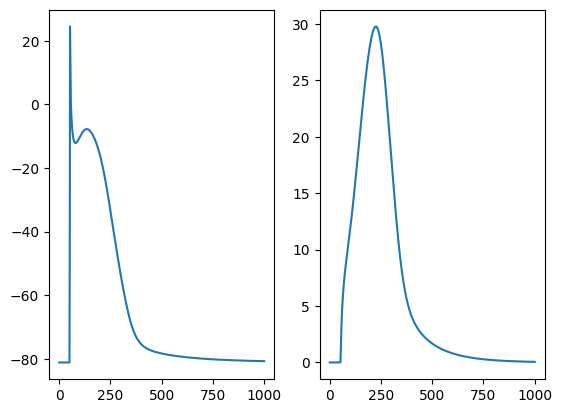

In [65]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].plot(results.time(), results['membrane.V'])
ax[1].plot(results.time(), results['rapid_delayed_rectifier_K_current.i_Kr'])

## Markov hERG channel

We are interested in changing section with rapid_delayed_rectifier_K_current as it actually refers to hERG
```
rapid_delayed_rectifier_K_current_xr_gate.xr      = 3.296e-5

[rapid_delayed_rectifier_K_current_xr_gate]
alpha_xr = piecewise(abs(membrane.V + 14.1 [mV]) < 1e-10 [mV], 0.0015 [mS/uF], 0.0003 [1/mV/ms] * (membrane.V + 14.1 [mV]) / (1 - exp((membrane.V + 14.1 [mV]) / -5 [mV])))
    in [mS/uF]
beta_xr = piecewise(abs(membrane.V - 3.3328 [mV]) < 1e-10 [mV],  3.78361180000000004e-4 [mS/uF],  7.38980000000000030e-5 [1/mV/ms] * (membrane.V - 3.3328 [mV]) / (exp((membrane.V - 3.3328 [mV]) / 5.1237 [mV]) - 1))
    in [mS/uF]
tau_xr = (alpha_xr + beta_xr)^(-1)
    in [ms]
dot(xr) = (xr_infinity - xr) / tau_xr
    in [1]
xr_infinity = (1 + exp((membrane.V + 14.1 [mV]) / -6.5 [mV]))^(-1)
    in [1]
```

In [55]:
fixed_sript="""
[[model]]
author: Liholip
documentation: "Fix"
name: courtemanche_1998
# Initial values
membrane.V                                        = -81.18
fast_sodium_current_m_gate.m                      = 0.002908
fast_sodium_current_h_gate.h                      = 0.9649
fast_sodium_current_j_gate.j                      = 0.9775
transient_outward_K_current_oa_gate.oa            = 0.03043
transient_outward_K_current_oi_gate.oi            = 0.9992
ultrarapid_delayed_rectifier_K_current_ua_gate.ua = 0.004966
ultrarapid_delayed_rectifier_K_current_ui_gate.ui = 0.9986
rapid_delayed_rectifier_K_current_xr_gate.C1 = 0.99
rapid_delayed_rectifier_K_current_xr_gate.C2 = 0.01
rapid_delayed_rectifier_K_current_xr_gate.C3 = 0
rapid_delayed_rectifier_K_current_xr_gate.O  = 0
rapid_delayed_rectifier_K_current_xr_gate.I = 0
slow_delayed_rectifier_K_current_xs_gate.xs       = 0.01869
L_type_Ca_channel_d_gate.d                        = 0.0001367
L_type_Ca_channel_f_gate.f                        = 0.9996
L_type_Ca_channel_f_Ca_gate.f_Ca                  = 0.7755
Ca_release_current_from_JSR_u_gate.u              = 2.35e-112
Ca_release_current_from_JSR_v_gate.v              = 1
Ca_release_current_from_JSR_w_gate.w              = 0.9992
intracellular_ion_concentrations.Na_i             = 11.17
intracellular_ion_concentrations.Ca_i             = 0.0001013
intracellular_ion_concentrations.K_i              = 139
intracellular_ion_concentrations.Ca_rel           = 1.488
intracellular_ion_concentrations.Ca_up            = 1.488





[Ca_buffers]
CMDN_max = 0.05 [mM]
    in [mM]
CSQN_max = 10 [mM]
    in [mM]
Ca_CMDN = CMDN_max * intracellular_ion_concentrations.Ca_i / (intracellular_ion_concentrations.Ca_i + Km_CMDN)
    in [mM]
Ca_CSQN = CSQN_max * intracellular_ion_concentrations.Ca_rel / (intracellular_ion_concentrations.Ca_rel + Km_CSQN)
    in [mM]
Ca_TRPN = TRPN_max * intracellular_ion_concentrations.Ca_i / (intracellular_ion_concentrations.Ca_i + Km_TRPN)
    in [mM]
Km_CMDN = 0.00238 [mM]
    in [mM]
Km_CSQN = 0.8 [mM]
    in [mM]
Km_TRPN = 0.0005 [mM]
    in [mM]
TRPN_max = 0.07 [mM]
    in [mM]

[Ca_leak_current_by_the_NSR]
Ca_up_max = 15 [mM]
    in [mM]
i_up_leak = Ca_uptake_current_by_the_NSR.I_up_max * intracellular_ion_concentrations.Ca_up / Ca_up_max
    in [mM/ms]

[Ca_release_current_from_JSR]
Fn = 1000 [m^3*s/mol (0.001)] * (1e-15 [1/m^3 (1e+18)] * intracellular_ion_concentrations.V_rel * i_rel - 1e-15 [1/m^3 (1e+18)] / (2 * membrane.F) * (0.5 * L_type_Ca_channel.i_Ca_L - 0.2 * Na_Ca_exchanger_current.i_NaCa))
    in [1]
K_rel = 30 [mS/uF]
    in [mS/uF]
i_rel = K_rel * Ca_release_current_from_JSR_u_gate.u^2 * Ca_release_current_from_JSR_v_gate.v * Ca_release_current_from_JSR_w_gate.w * (intracellular_ion_concentrations.Ca_rel - intracellular_ion_concentrations.Ca_i)
    in [mM/ms]

[Ca_release_current_from_JSR_u_gate]
tau_u = 8 [ms]
    in [ms]
dot(u) = (u_infinity - u) / tau_u
    in [1]
u_infinity = (1 + exp(-(Ca_release_current_from_JSR.Fn -  3.41749999999999983e-13) / 1.367e-15))^(-1)
    in [1]

[Ca_release_current_from_JSR_v_gate]
tau_v = 1.91 [ms] + 2.09 [ms] * (1 + exp(-(Ca_release_current_from_JSR.Fn -  3.41749999999999983e-13) / 1.367e-15))^(-1)
    in [ms]
dot(v) = (v_infinity - v) / tau_v
    in [1]
v_infinity = 1 - (1 + exp(-(Ca_release_current_from_JSR.Fn - 6.835e-14) / 1.367e-15))^(-1)
    in [1]

[Ca_release_current_from_JSR_w_gate]
tau_w = piecewise(abs(membrane.V - 7.9 [mV]) < 1e-10 [mV], 6 [ms] * 0.2 / 1.3, 6 [ms] * (1 - exp(-(membrane.V - 7.9 [mV]) / 5 [mV])) / ((1 + 0.3 * exp(-(membrane.V - 7.9 [mV]) / 5 [mV])) * 1 [1/mV] * (membrane.V - 7.9 [mV])))
    in [ms]
dot(w) = (w_infinity - w) / tau_w
    in [1]
w_infinity = 1 - (1 + exp(-(membrane.V - 40 [mV]) / 17 [mV]))^(-1)
    in [1]

[Ca_uptake_current_by_the_NSR]
I_up_max = 0.005 [mM/ms]
    in [mM/ms]
K_up = 0.00092 [mM]
    in [mM]
i_up = I_up_max / (1 + K_up / intracellular_ion_concentrations.Ca_i)
    in [mM/ms]

[L_type_Ca_channel]
g_Ca_L = 0.12375 [mS/uF]
    in [mS/uF]
i_Ca_L = membrane.Cm * g_Ca_L * L_type_Ca_channel_d_gate.d * L_type_Ca_channel_f_gate.f * L_type_Ca_channel_f_Ca_gate.f_Ca * (membrane.V - 65 [mV])
    in [pA]

[L_type_Ca_channel_d_gate]
dot(d) = (d_infinity - d) / tau_d
    in [1]
d_infinity = (1 + exp((membrane.V + 10 [mV]) / -8 [mV]))^(-1)
    in [1]
tau_d = piecewise(abs(membrane.V + 10 [mV]) < 1e-10 [mV], 4.579 [ms] / (1 + exp((membrane.V + 10 [mV]) / -6.24 [mV])), (1 - exp((membrane.V + 10 [mV]) / -6.24 [mV])) / (0.035 [1/mV/ms] * (membrane.V + 10 [mV]) * (1 + exp((membrane.V + 10 [mV]) / -6.24 [mV]))))
    in [ms]

[L_type_Ca_channel_f_Ca_gate]
dot(f_Ca) = (f_Ca_infinity - f_Ca) / tau_f_Ca
    in [1]
f_Ca_infinity = (1 + intracellular_ion_concentrations.Ca_i / 0.00035 [mM])^(-1)
    in [1]
tau_f_Ca = 2 [ms]
    in [ms]

[L_type_Ca_channel_f_gate]
dot(f) = (f_infinity - f) / tau_f
    in [1]
f_infinity = exp(-(membrane.V + 28 [mV]) / 6.9 [mV]) / (1 + exp(-(membrane.V + 28 [mV]) / 6.9 [mV]))
    in [1]
tau_f = 9 [ms] * (0.0197 * exp(-0.0337 [1/mV]^2 * (membrane.V + 10 [mV])^2) + 0.02)^(-1)
    in [ms]

[Na_Ca_exchanger_current]
I_NaCa_max = 1600 [A/F]
    in [A/F]
K_mCa = 1.38 [mM]
    in [mM]
K_mNa = 87.5 [mM]
    in [mM]
K_sat = 0.1
    in [1]
gamma = 0.35
    in [1]
i_NaCa = membrane.Cm * I_NaCa_max * (exp(gamma * membrane.F * membrane.V / (membrane.R * membrane.T)) * intracellular_ion_concentrations.Na_i^3 * standard_ionic_concentrations.Ca_o - exp((gamma - 1) * membrane.F * membrane.V / (membrane.R * membrane.T)) * standard_ionic_concentrations.Na_o^3 * intracellular_ion_concentrations.Ca_i) / ((K_mNa^3 + standard_ionic_concentrations.Na_o^3) * (K_mCa + standard_ionic_concentrations.Ca_o) * (1 + K_sat * exp((gamma - 1) * membrane.V * membrane.F / (membrane.R * membrane.T))))
    in [pA]

[background_currents]
E_Ca = membrane.R * membrane.T / (2 * membrane.F) * log(standard_ionic_concentrations.Ca_o / intracellular_ion_concentrations.Ca_i)
    in [mV]
g_B_Ca = 0.001131 [mS/uF]
    in [mS/uF]
g_B_K = 0 [mS/uF]
    in [mS/uF]
g_B_Na =  6.74437500000000015e-4 [mS/uF]
    in [mS/uF]
i_B_Ca = membrane.Cm * g_B_Ca * (membrane.V - E_Ca)
    in [pA]
i_B_K = membrane.Cm * g_B_K * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]
i_B_Na = membrane.Cm * g_B_Na * (membrane.V - fast_sodium_current.E_Na)
    in [pA]

[environment]
time = 0 [ms] bind time
    in [ms]
pace = 0 [ms] bind pace
    in [ms]

[fast_sodium_current]
E_Na = membrane.R * membrane.T / membrane.F * log(standard_ionic_concentrations.Na_o / intracellular_ion_concentrations.Na_i)
    in [mV]
g_Na = 7.8 [mS/uF]
    in [mS/uF]
i_Na = membrane.Cm * g_Na * fast_sodium_current_m_gate.m^3 * fast_sodium_current_h_gate.h * fast_sodium_current_j_gate.j * (membrane.V - E_Na)
    in [pA]

[fast_sodium_current_h_gate]
alpha_h = piecewise(membrane.V < -40 [mV], 0.135 [mS/uF] * exp((membrane.V + 80 [mV]) / -6.8 [mV]), 0 [mS/uF])
    in [mS/uF]
beta_h = piecewise(membrane.V < -40 [mV], 3.56 [mS/uF] * exp(0.079 [1/mV] * membrane.V) + 310000 [mS/uF] * exp(0.35 [1/mV] * membrane.V), 1 / (0.13 [ms] * (1 + exp((membrane.V + 10.66 [mV]) / -11.1 [mV]))))
    in [mS/uF]
dot(h) = (h_inf - h) / tau_h
    in [1]
h_inf = alpha_h / (alpha_h + beta_h)
    in [1]
tau_h = 1 / (alpha_h + beta_h)
    in [ms]

[fast_sodium_current_j_gate]
alpha_j = piecewise(membrane.V < -40 [mV], (-127140 [1/mV/ms] * exp(0.2444 [1/mV] * membrane.V) - 3.474e-5 [1/mV/ms] * exp(-0.04391 [1/mV] * membrane.V)) * (membrane.V + 37.78 [mV]) / (1 + exp(0.311 [1/mV] * (membrane.V + 79.23 [mV]))), 0 [mS/uF])
    in [mS/uF]
beta_j = piecewise(membrane.V < -40 [mV], 0.1212 [mS/uF] * exp(-0.01052 [1/mV] * membrane.V) / (1 + exp(-0.1378 [1/mV] * (membrane.V + 40.14 [mV]))), 0.3 [mS/uF] * exp(-2.535e-7 [1/mV] * membrane.V) / (1 + exp(-0.1 [1/mV] * (membrane.V + 32 [mV]))))
    in [mS/uF]
dot(j) = (j_inf - j) / tau_j
    in [1]
j_inf = alpha_j / (alpha_j + beta_j)
    in [1]
tau_j = 1 / (alpha_j + beta_j)
    in [ms]

[fast_sodium_current_m_gate]
alpha_m = piecewise(membrane.V == -47.13 [mV], 3.2 [mS/uF], 0.32 [1/mV/ms] * (membrane.V + 47.13 [mV]) / (1 - exp(-0.1 [1/mV] * (membrane.V + 47.13 [mV]))))
    in [mS/uF]
beta_m = 0.08 [mS/uF] * exp(-membrane.V / 11 [mV])
    in [mS/uF]
dot(m) = (m_inf - m) / tau_m
    in [1]
m_inf = alpha_m / (alpha_m + beta_m)
    in [1]
tau_m = 1 / (alpha_m + beta_m)
    in [ms]

[intracellular_ion_concentrations]
B1 = (2 * Na_Ca_exchanger_current.i_NaCa - (sarcolemmal_calcium_pump_current.i_CaP + L_type_Ca_channel.i_Ca_L + background_currents.i_B_Ca)) / (2 * V_i * membrane.F) + (V_up * (Ca_leak_current_by_the_NSR.i_up_leak - Ca_uptake_current_by_the_NSR.i_up) + Ca_release_current_from_JSR.i_rel * V_rel) / V_i
    in [mM/ms]
B2 = 1 + Ca_buffers.TRPN_max * Ca_buffers.Km_TRPN / (Ca_i + Ca_buffers.Km_TRPN)^2 + Ca_buffers.CMDN_max * Ca_buffers.Km_CMDN / (Ca_i + Ca_buffers.Km_CMDN)^2
    in [1]
dot(Ca_i) = B1 / B2
    in [mM]
dot(Ca_rel) = (transfer_current_from_NSR_to_JSR.i_tr - Ca_release_current_from_JSR.i_rel) * (1 + Ca_buffers.CSQN_max * Ca_buffers.Km_CSQN / (Ca_rel + Ca_buffers.Km_CSQN)^2)^(-1)
    in [mM]
dot(Ca_up) = Ca_uptake_current_by_the_NSR.i_up - (Ca_leak_current_by_the_NSR.i_up_leak + transfer_current_from_NSR_to_JSR.i_tr * V_rel / V_up)
    in [mM]
dot(K_i) = (2 * sodium_potassium_pump.i_NaK - (time_independent_potassium_current.i_K1 + transient_outward_K_current.i_to + ultrarapid_delayed_rectifier_K_current.i_Kur + rapid_delayed_rectifier_K_current.i_Kr + slow_delayed_rectifier_K_current.i_Ks + background_currents.i_B_K)) / (V_i * membrane.F)
    in [mM]
dot(Na_i) = (-3 * sodium_potassium_pump.i_NaK - (3 * Na_Ca_exchanger_current.i_NaCa + background_currents.i_B_Na + fast_sodium_current.i_Na)) / (V_i * membrane.F)
    in [mM]
V_cell = 20100 [um^3]
    in [um^3]
V_i = V_cell * 0.68
    in [um^3]
V_rel = 0.0048 * V_cell
    in [um^3]
V_up = 0.0552 * V_cell
    in [um^3]

[stimulus]
amplitude = 2000 [uA/cm^2]
IStim = environment.pace * amplitude

[membrane]
Cm = 100 [pF]
    in [pF]
F = 96.4867 [C/mmol]
    in [C/mmol]
R = 8.3143 [J/mol/K]
    in [J/mol/K]
T = 310 [K]
    in [K]
dot(V) = -(fast_sodium_current.i_Na + time_independent_potassium_current.i_K1 + transient_outward_K_current.i_to + ultrarapid_delayed_rectifier_K_current.i_Kur + rapid_delayed_rectifier_K_current.i_Kr + slow_delayed_rectifier_K_current.i_Ks + background_currents.i_B_Na + background_currents.i_B_Ca + sodium_potassium_pump.i_NaK + sarcolemmal_calcium_pump_current.i_CaP + Na_Ca_exchanger_current.i_NaCa + L_type_Ca_channel.i_Ca_L - stimulus.IStim) / Cm
    in [mV]

[rapid_delayed_rectifier_K_current]
g_Kr =  2.94117649999999994e-2 [mS/uF]
    in [mS/uF]
i_Kr = membrane.Cm * g_Kr * rapid_delayed_rectifier_K_current_xr_gate.O * (membrane.V - time_independent_potassium_current.E_K) / (1 + exp((membrane.V + 15 [mV]) / 22.4 [mV]))
    in [pA]

[rapid_delayed_rectifier_K_current_xr_gate]
a1 = 0.022348 [1 / ms] * exp(membrane.V * 0.01176 [1 / ms])
b1 = 0.047002 [1 / ms] * exp(membrane.V * 0.0631 [1 / ms])
Kf = 0.023761 [1 / ms]
Kb =  0.036778 [1 / ms]
a2 = 0.013733 [1 / ms] * exp(membrane.V * 0.038198 [1 / ms])
b2 = 0.0000689 [1 / ms] * exp(membrane.V * 0.04178 [1 / ms])

dot(C1) = -C1 * (a1)           + C2 * b1
dot(C2) = -C2 * (Kf + b1)      + C1 * a1 + C3 * Kb
dot(C3) = -C3 * (Kb + a2)      + C2 * Kf + O * b2
dot(O)  = -O * (b2 + a1)      + C3 * a2 + I * b1
dot(I)  = -I  * (b1)           + O * a1



[sarcolemmal_calcium_pump_current]
i_CaP = membrane.Cm * i_CaP_max * intracellular_ion_concentrations.Ca_i / (0.0005 [mM] + intracellular_ion_concentrations.Ca_i)
    in [pA]
i_CaP_max = 0.275 [A/F]
    in [A/F]

[slow_delayed_rectifier_K_current]
g_Ks =  1.29411759999999987e-1 [mS/uF]
    in [mS/uF]
i_Ks = membrane.Cm * g_Ks * slow_delayed_rectifier_K_current_xs_gate.xs^2 * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]

[slow_delayed_rectifier_K_current_xs_gate]
alpha_xs = piecewise(abs(membrane.V - 19.9 [mV]) < 1e-10 [mV], 0.00068 [mS/uF], 4e-5 [1/mV/ms] * (membrane.V - 19.9 [mV]) / (1 - exp((membrane.V - 19.9 [mV]) / -17 [mV])))
    in [mS/uF]
beta_xs = piecewise(abs(membrane.V - 19.9 [mV]) < 1e-10 [mV], 0.000315 [mS/uF], 3.5e-5 [1/mV/ms] * (membrane.V - 19.9 [mV]) / (exp((membrane.V - 19.9 [mV]) / 9 [mV]) - 1))
    in [mS/uF]
tau_xs = 0.5 * (alpha_xs + beta_xs)^(-1)
    in [ms]
dot(xs) = (xs_infinity - xs) / tau_xs
    in [1]
xs_infinity = (1 + exp((membrane.V - 19.9 [mV]) / -12.7 [mV]))^(-0.5)
    in [1]

[sodium_potassium_pump]
Km_K_o = 1.5 [mM]
    in [mM]
Km_Na_i = 10 [mM]
    in [mM]
f_NaK = (1 + 0.1245 * exp(-0.1 * membrane.F * membrane.V / (membrane.R * membrane.T)) + 0.0365 * sigma * exp(-membrane.F * membrane.V / (membrane.R * membrane.T)))^(-1)
    in [1]
i_NaK = membrane.Cm * i_NaK_max * f_NaK * 1 / (1 + (Km_Na_i / intracellular_ion_concentrations.Na_i)^1.5) * standard_ionic_concentrations.K_o / (standard_ionic_concentrations.K_o + Km_K_o)
    in [pA]
i_NaK_max =  5.99338739999999981e-1 [A/F]
    in [A/F]
sigma = 1 / 7 * (exp(standard_ionic_concentrations.Na_o / 67.3 [mM]) - 1)
    in [1]

[standard_ionic_concentrations]
Ca_o = 1.8 [mM]
    in [mM]
K_o = 5.4 [mM]
    in [mM]
Na_o = 140 [mM]
    in [mM]

[time_independent_potassium_current]
E_K = membrane.R * membrane.T / membrane.F * log(standard_ionic_concentrations.K_o / intracellular_ion_concentrations.K_i)
    in [mV]
g_K1 = 0.09 [mS/uF]
    in [mS/uF]
i_K1 = membrane.Cm * g_K1 * (membrane.V - E_K) / (1 + exp(0.07 [1/mV] * (membrane.V + 80 [mV])))
    in [pA]

[transfer_current_from_NSR_to_JSR]
i_tr = (intracellular_ion_concentrations.Ca_up - intracellular_ion_concentrations.Ca_rel) / tau_tr
    in [mM/ms]
tau_tr = 180 [ms]
    in [ms]

[transient_outward_K_current]
K_Q10 = 3
    in [1]
g_to = 0.1652 [mS/uF]
    in [mS/uF]
i_to = membrane.Cm * g_to * transient_outward_K_current_oa_gate.oa^3 * transient_outward_K_current_oi_gate.oi * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]

[transient_outward_K_current_oa_gate]
alpha_oa = 0.65 [mS/uF] * (exp((membrane.V - -10 [mV]) / -8.5 [mV]) + exp((membrane.V - -10 [mV] - 40 [mV]) / -59 [mV]))^(-1)
    in [mS/uF]
beta_oa = 0.65 [mS/uF] * (2.5 + exp((membrane.V - -10 [mV] + 72 [mV]) / 17 [mV]))^(-1)
    in [mS/uF]
dot(oa) = (oa_infinity - oa) / tau_oa
    in [1]
oa_infinity = (1 + exp((membrane.V - -10 [mV] + 10.47 [mV]) / -17.54 [mV]))^(-1)
    in [1]
tau_oa = (alpha_oa + beta_oa)^(-1) / transient_outward_K_current.K_Q10
    in [ms]

[transient_outward_K_current_oi_gate]
alpha_oi = (18.53 [ms] + 1 [ms] * exp((membrane.V - -10 [mV] + 103.7 [mV]) / 10.95 [mV]))^(-1)
    in [mS/uF]
beta_oi = (35.56 [ms] + 1 [ms] * exp((membrane.V - -10 [mV] - 8.74 [mV]) / -7.44 [mV]))^(-1)
    in [mS/uF]
dot(oi) = (oi_infinity - oi) / tau_oi
    in [1]
oi_infinity = (1 + exp((membrane.V - -10 [mV] + 33.1 [mV]) / 5.3 [mV]))^(-1)
    in [1]
tau_oi = (alpha_oi + beta_oi)^(-1) / transient_outward_K_current.K_Q10
    in [ms]

[ultrarapid_delayed_rectifier_K_current]
g_Kur = 0.005 [mS/uF] + 0.05 [mS/uF] / (1 + exp((membrane.V - 15 [mV]) / -13 [mV]))
    in [mS/uF]
i_Kur = membrane.Cm * g_Kur * ultrarapid_delayed_rectifier_K_current_ua_gate.ua^3 * ultrarapid_delayed_rectifier_K_current_ui_gate.ui * (membrane.V - time_independent_potassium_current.E_K)
    in [pA]

[ultrarapid_delayed_rectifier_K_current_ua_gate]
alpha_ua = 0.65 [mS/uF] * (exp((membrane.V - -10 [mV]) / -8.5 [mV]) + exp((membrane.V - -10 [mV] - 40 [mV]) / -59 [mV]))^(-1)
    in [mS/uF]
beta_ua = 0.65 [mS/uF] * (2.5 + exp((membrane.V - -10 [mV] + 72 [mV]) / 17 [mV]))^(-1)
    in [mS/uF]
tau_ua = (alpha_ua + beta_ua)^(-1) / transient_outward_K_current.K_Q10
    in [ms]
dot(ua) = (ua_infinity - ua) / tau_ua
    in [1]
ua_infinity = (1 + exp((membrane.V - -10 [mV] + 20.3 [mV]) / -9.6 [mV]))^(-1)
    in [1]

[ultrarapid_delayed_rectifier_K_current_ui_gate]
alpha_ui = (21 [ms] + 1 [ms] * exp((membrane.V - -10 [mV] - 195 [mV]) / -28 [mV]))^(-1)
    in [mS/uF]
beta_ui = 1 [mS/uF] / exp((membrane.V - -10 [mV] - 168 [mV]) / -16 [mV])
    in [mS/uF]
tau_ui = (alpha_ui + beta_ui)^(-1) / transient_outward_K_current.K_Q10
    in [ms]
dot(ui) = (ui_infinity - ui) / tau_ui
    in [1]
ui_infinity = (1 + exp((membrane.V - -10 [mV] - 109.45 [mV]) / 27.48 [mV]))^(-1)
    in [1]

[[protocol]]
# Level  Start    Length   Period   Multiplier
1.0      50      2        1000     50
"""

with open("markov_herg_courtemanche.mmd","w") as f:
    f.write(fixed_sript)

In [76]:
model, protocol, _ = myokit.load("markov_herg_courtemanche.mmd")
simulation = myokit.Simulation(model,protocol)
results = simulation.run(20_000)

INFO:root:running build_ext
INFO:root:building 'myokit_sim_19_8883527566505238292' extension
INFO:root:creating build/temp.linux-x86_64-cpython-311/tmp/tmpvzf_pki8myokit
INFO:root:x86_64-linux-gnu-gcc -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/include -I/usr/local/lib/python3.11/dist-packages/myokit/_sim -I/usr/local/lib/python3.11/dist-packages/myokit/_sim -I/usr/include/python3.11 -c /tmp/tmpvzf_pki8myokit/source.c -o build/temp.linux-x86_64-cpython-311/tmp/tmpvzf_pki8myokit/source.o
INFO:root:creating build/lib.linux-x86_64-cpython-311
INFO:root:x86_64-linux-gnu-gcc -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 build/temp.linux-x86_64-cpython-311/tmp/tmpvzf_pki8myokit/source.o -L/usr/local/lib -L/usr/local/lib64 -L/usr/lib/x86_64-linux-gnu -Wl,--enable-new-dtags,-rpath,/usr/local/lib -Wl,--enable-new-dtags,-rpath,/usr/local/lib64 -lsundials_cvodes -lsun

Membrane and hERG current

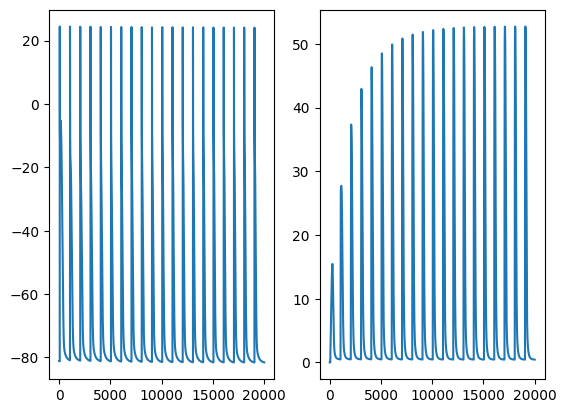

In [77]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2)
ax[0].plot(results.time(), results['membrane.V'])
ax[1].plot(results.time(), results['rapid_delayed_rectifier_K_current.i_Kr'])

hERG gates

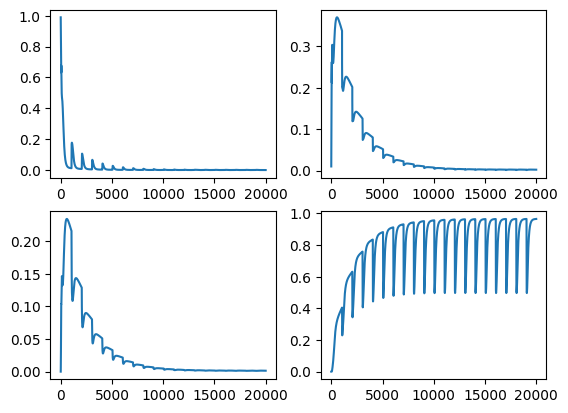

In [78]:
fig,ax = plt.subplots(2,2)
ax[0][0].plot(results.time(), results['rapid_delayed_rectifier_K_current_xr_gate.C1'])
ax[0][1].plot(results.time(), results['rapid_delayed_rectifier_K_current_xr_gate.C2'])
ax[1][0].plot(results.time(), results['rapid_delayed_rectifier_K_current_xr_gate.C3'])
ax[1][1].plot(results.time(), results['rapid_delayed_rectifier_K_current_xr_gate.I'])